In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
# connect with drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
# paths for dataset
data_path = "/content/drive/MyDrive/archive.zip"

In [4]:
import zipfile
# Directory where you want to extract the zip file
extracted_dir_path = '/content/leapgestrecog'
# Unzip the file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)
# List extracted files (optional)
extracted_files = os.listdir(extracted_dir_path)
print("Extracted files:", extracted_files)


Extracted files: ['leapgestrecog', 'leapGestRecog']


In [5]:
import shutil
shutil.rmtree("/content/leapgestrecog/leapgestrecog")

## The Data

In [6]:
extracted_dir_path = '/content/leapgestrecog/leapGestRecog'

In [7]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(extracted_dir_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(extracted_dir_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 6, 5, ..., 6, 5, 5],
        [5, 5, 6, ..., 5, 5, 5],
        [5, 5, 6, ..., 6, 6, 5],
        ...,
        [5, 5, 6, ..., 8, 7, 6],
        [4, 5, 5, ..., 7, 8, 6],
        [5, 5, 6, ..., 8, 7, 6]], dtype=uint8),
 0]

In [8]:
# shuffle the input data
import random
random.shuffle(image_data)

In [9]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [10]:
label[:10]

[4, 3, 7, 3, 3, 4, 6, 7, 7, 6]

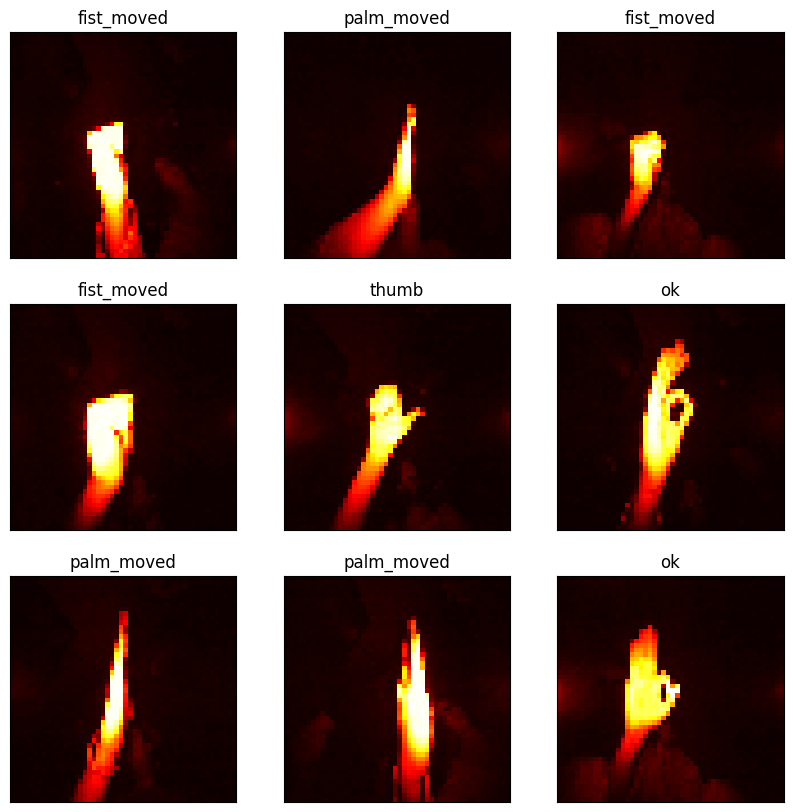

In [11]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [12]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [13]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [14]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## The Model

In [16]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 131s 297ms/step - loss: 0.3665 - accuracy: 0.8773 - val_loss: 0.0144 - val_accuracy: 0.9965
Epoch 2/7
438/438 [==============================] - 115s 263ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0040 - val_accuracy: 0.9985
Epoch 3/7
438/438 [==============================] - 118s 270ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0710 - val_accuracy: 0.9763
Epoch 4/7
438/438 [==============================] - 116s 265ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.0062 - val_accuracy: 0.9987
Epoch 5/7
438/438 [==============================] - 135s 307ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0092 - val_accuracy: 0.9968
Epoch 6/7
438/438 [==============================] - 116s 265ms/step - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 7/7
438/438 [==============================] - 121s 276ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0014 - val_ac

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

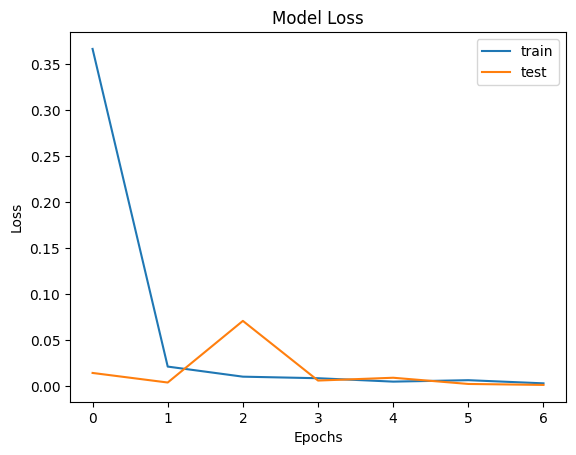

In [19]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

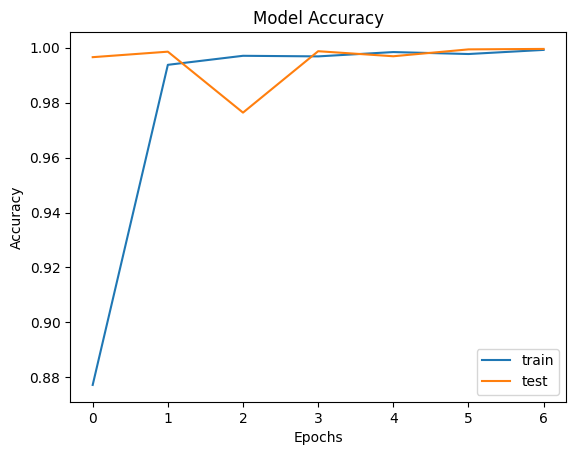

In [20]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [21]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 12s 64ms/step - loss: 0.0014 - accuracy: 0.9995
Test accuracy: 99.95%


## Confusion Matrix

188/188 [==============================] - 12s 65ms/step


[]

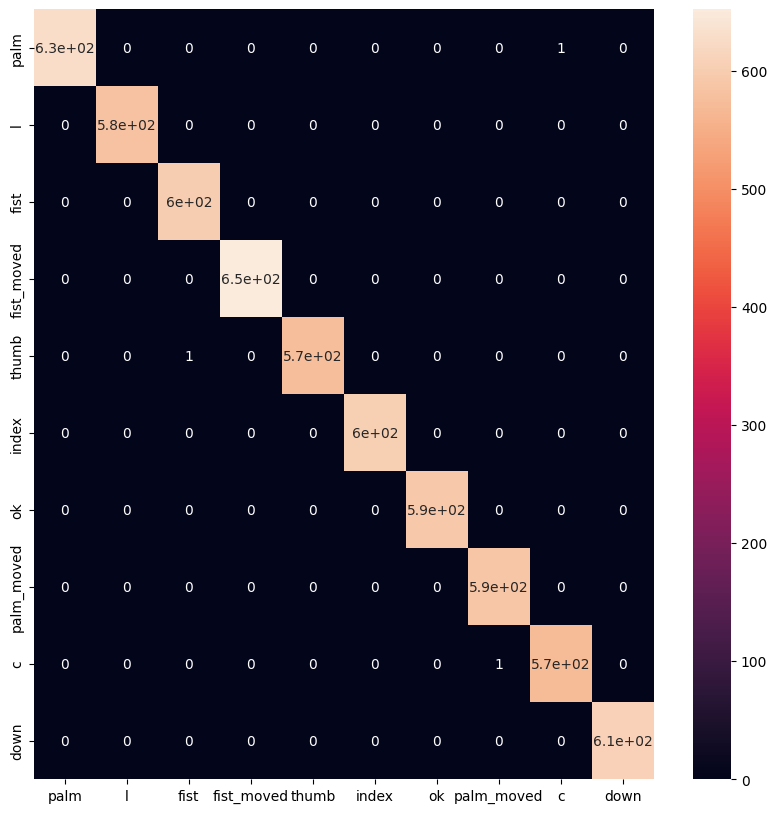

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()